In [2]:
import pandas as pd
import numpy as np
import gc
import sys
from sys import stdout
#sys.path.append(path+'/src/python/')
from time import time

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from seaborn.linearmodels import *

from sklearn.metrics import mean_squared_error as rmse
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics

#import xgboost as xgb

path = './data/'
train_file = path + 'train.csv'
test_file = path + 'test.csv'

output_file = 'eda'
final_file = '0104_'+output_file+'.csv'

In [3]:
df_train = pd.read_csv(train_file)
df_train = df_train.drop("Id",axis=1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
target = df_train["SalePrice"]
#y_train = np.ravel(target)
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
df_train.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [4]:
df_train_num = df_train._get_numeric_data()
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
np.sum(df_train_num.isnull()) 

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [6]:
## fill na using mean value
df_train_num = df_train_num.interpolate(method='linear')
# df_train_num['LotFrontage'] = df_train_num['LotFrontage'].fillna(df_train_num['LotFrontage'].mean())
# df_train_num['MasVnrArea'] = df_train_num['MasVnrArea'].fillna(df_train_num['MasVnrArea'].mean())
# df_train_num['GarageYrBlt'] = df_train_num['GarageYrBlt'].fillna(df_train_num['GarageYrBlt'].mean())

np.sum(df_train_num.isnull()) 

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

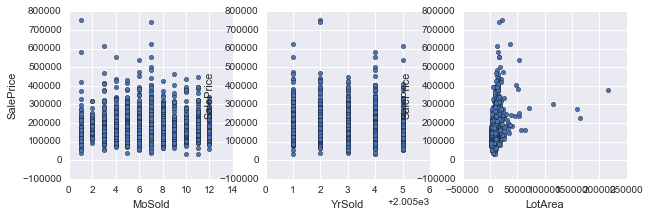

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
df_train_num.plot(ax=axes[0], kind='scatter', x='MoSold', y='SalePrice')
df_train_num.plot(ax=axes[1], kind='scatter', x='YrSold', y='SalePrice')
df_train_num.plot(ax=axes[2], kind='scatter', x='LotArea', y='SalePrice')

In [8]:
target = df_train["SalePrice"].values 
y_train_series = pd.Series(y_train, name='MEDV')

In [9]:
df_train_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


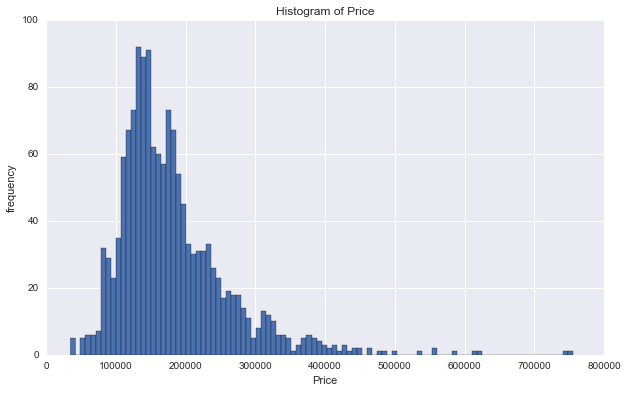

In [10]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('Price')
plt.title('Histogram of Price')
y_train_series.hist(bins=100)

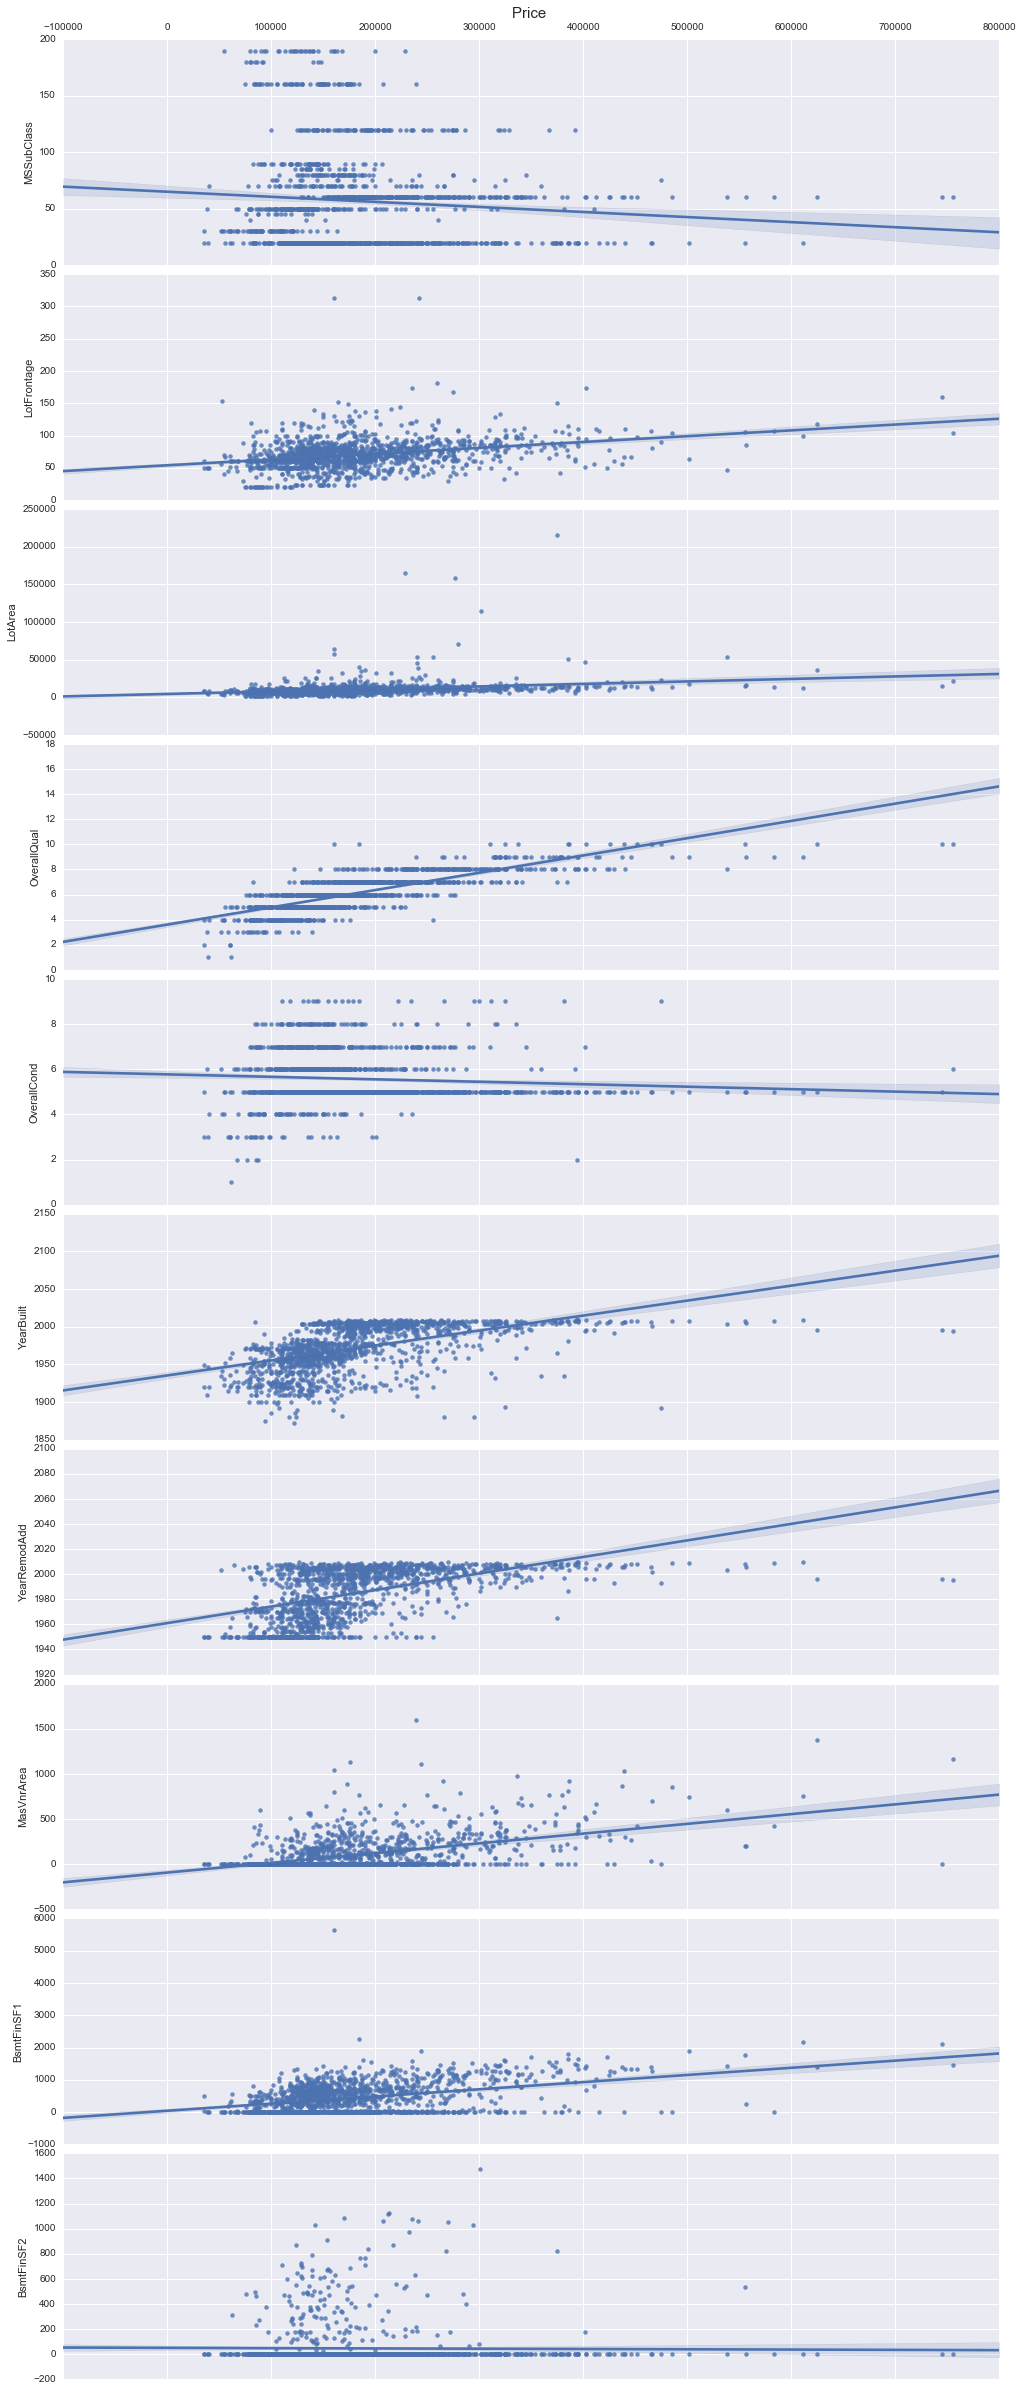

In [11]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(0,10):
    ax1 = plt.subplot(gs[i,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

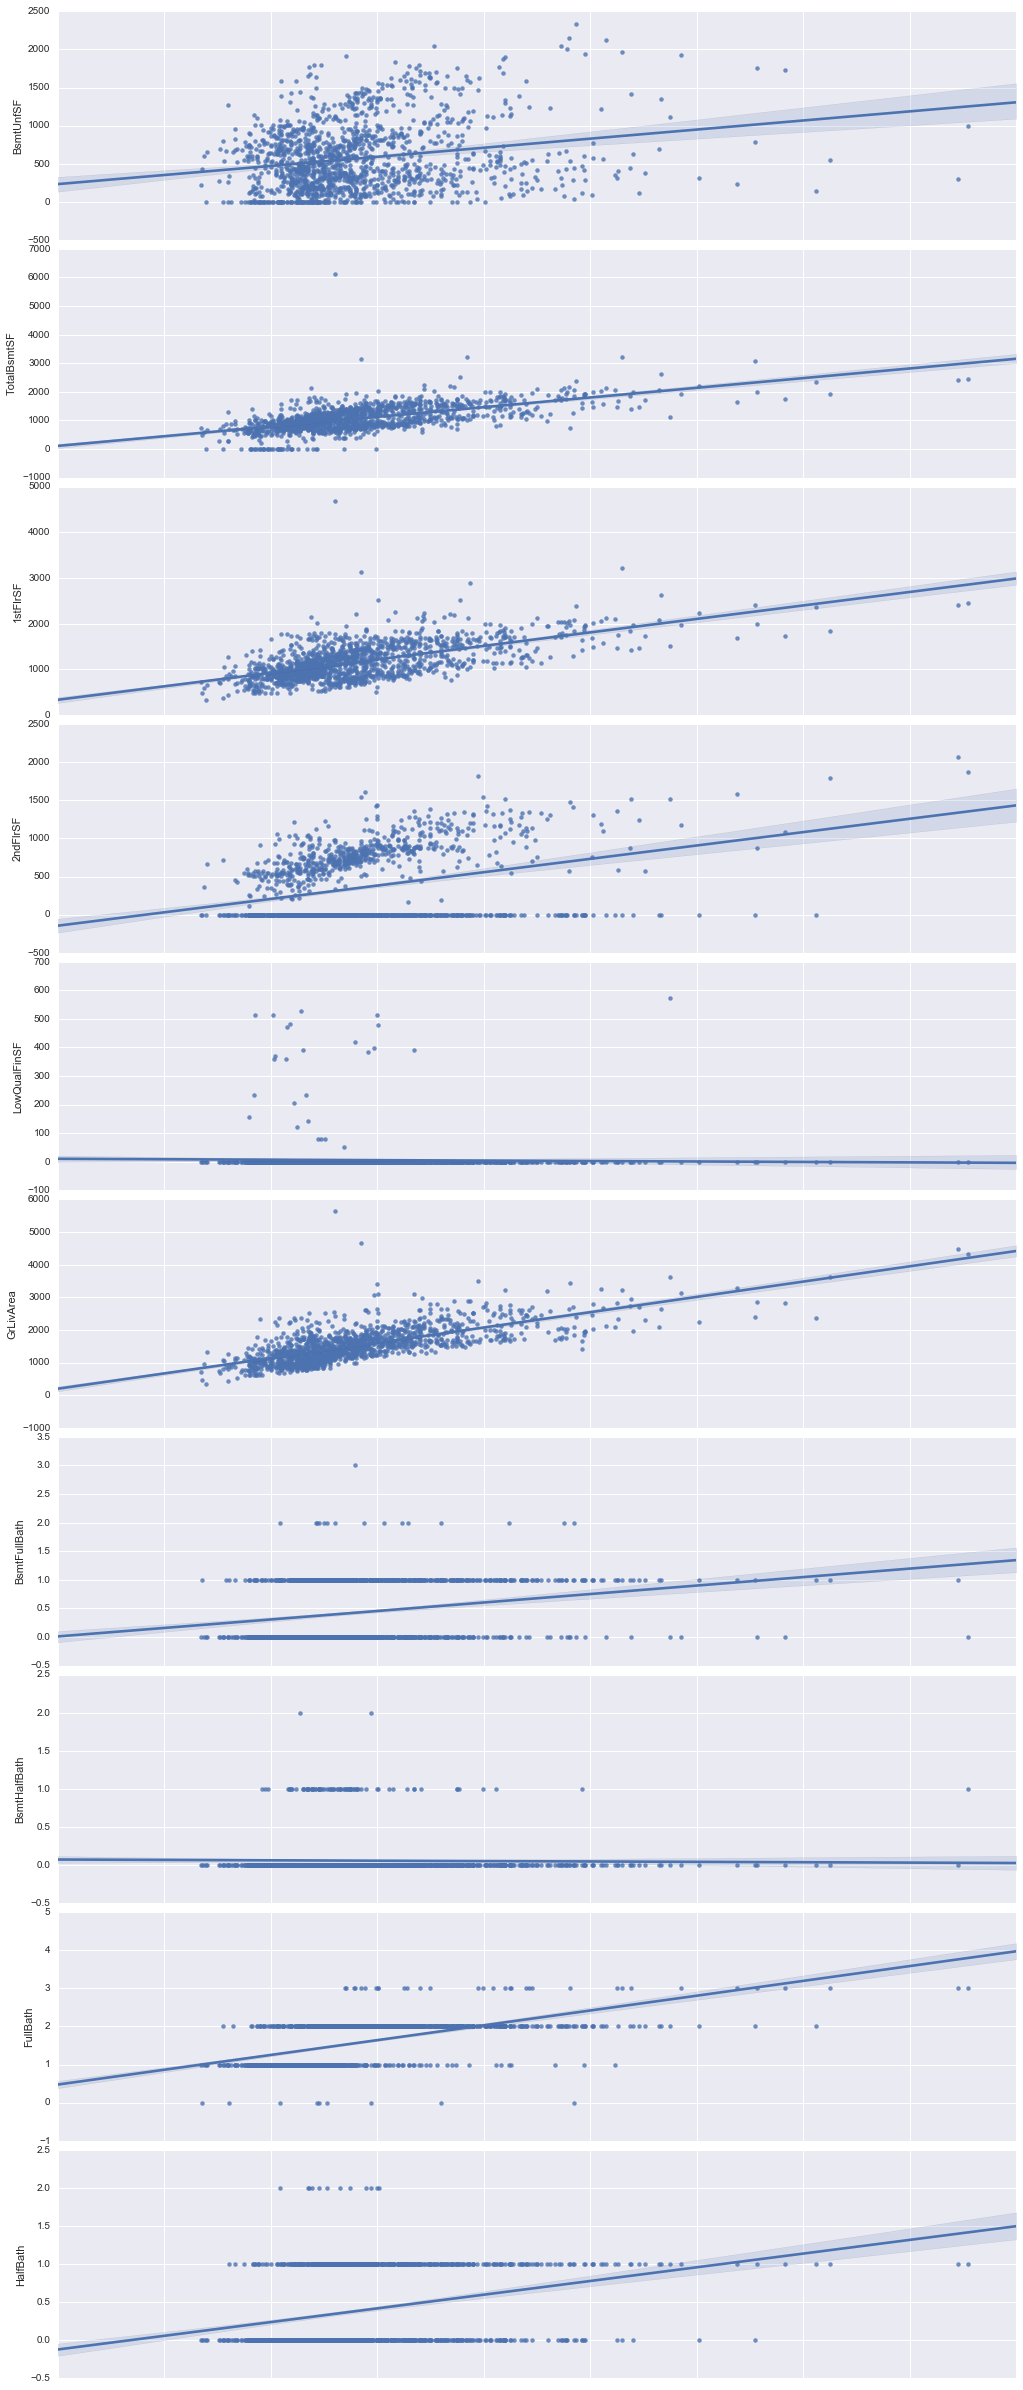

In [12]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(10,20):
    ax1 = plt.subplot(gs[i-10,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

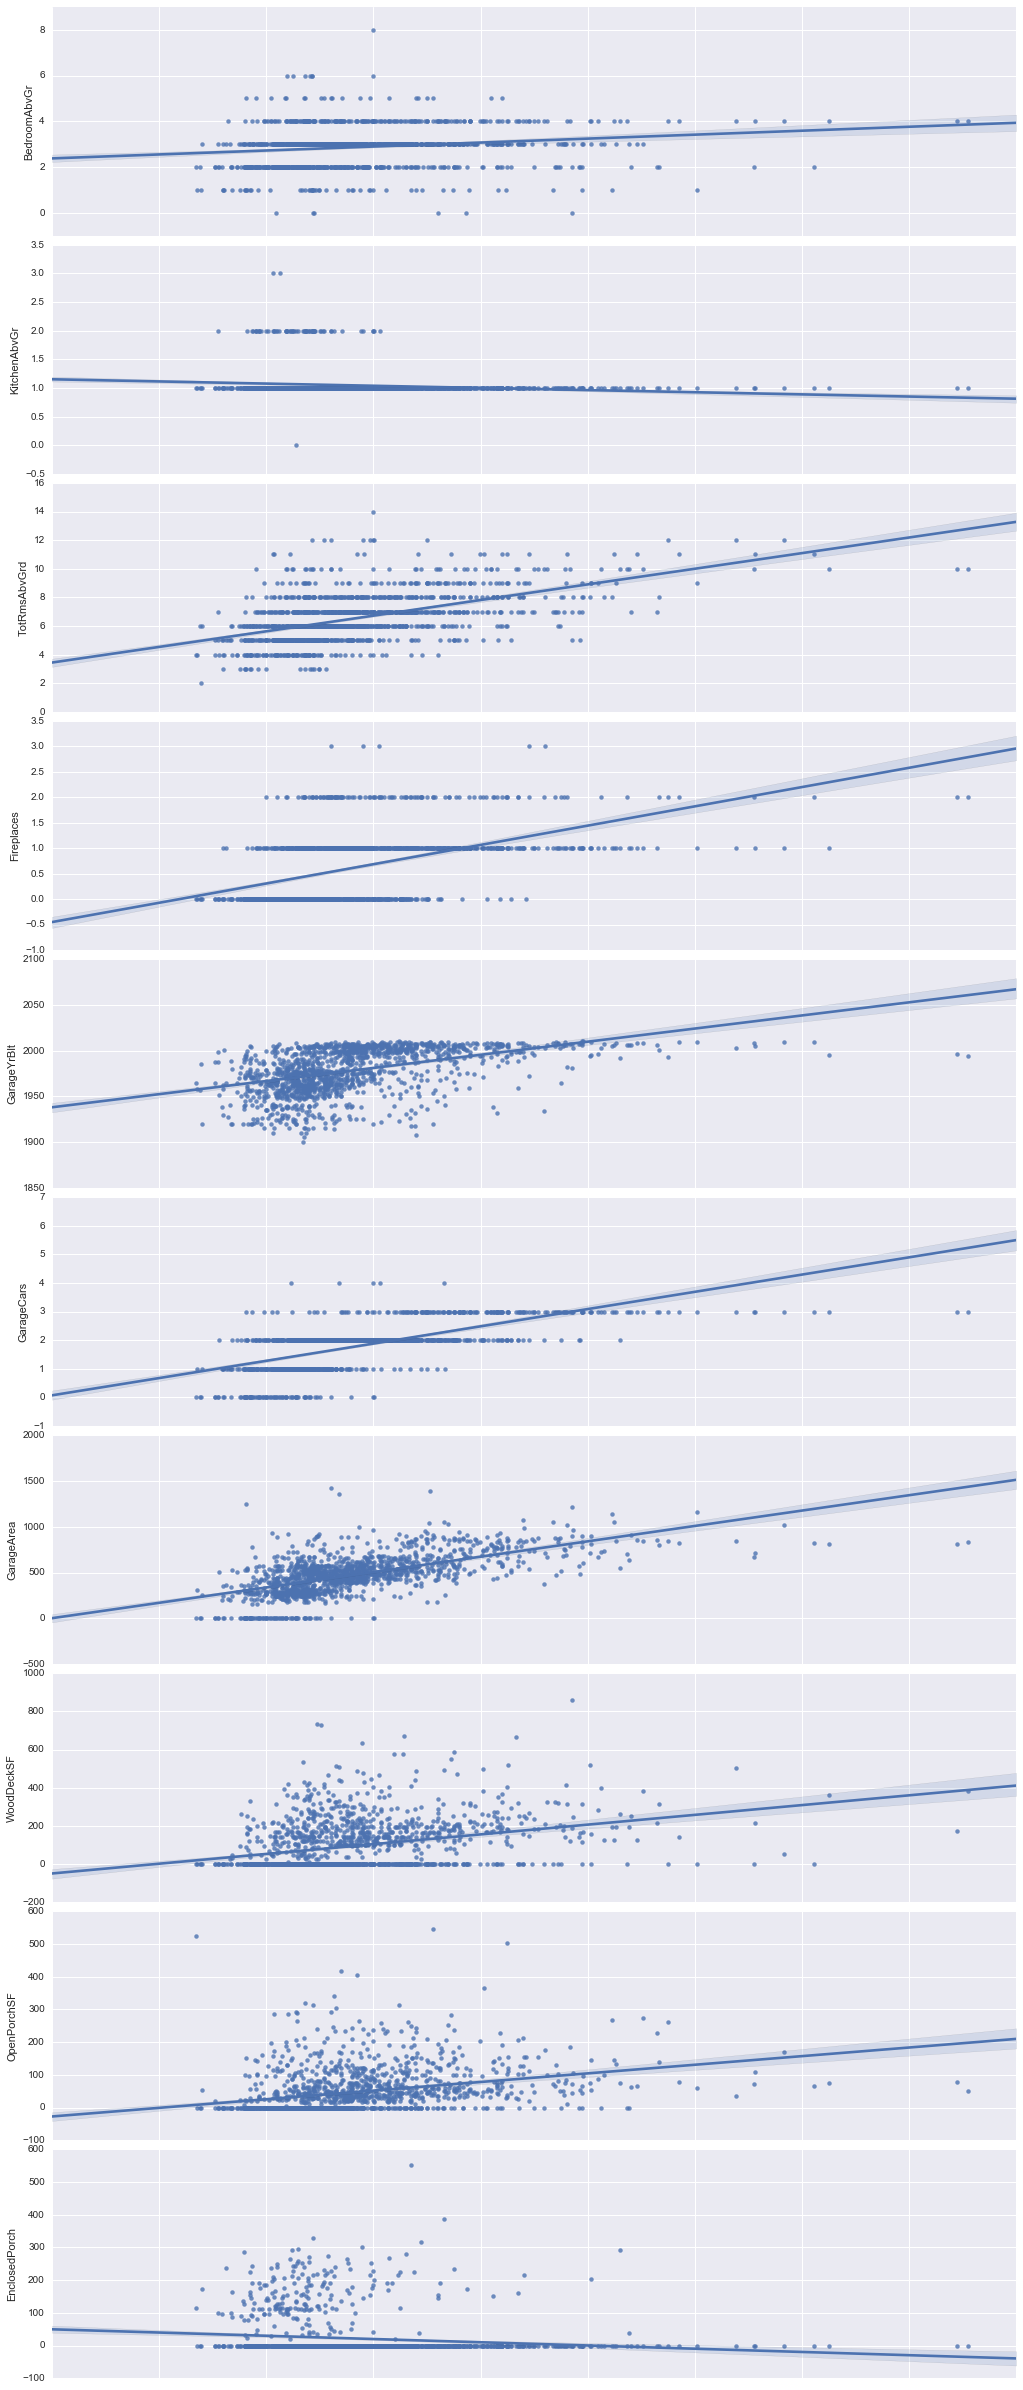

In [13]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(20,30):
    ax1 = plt.subplot(gs[i-20,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

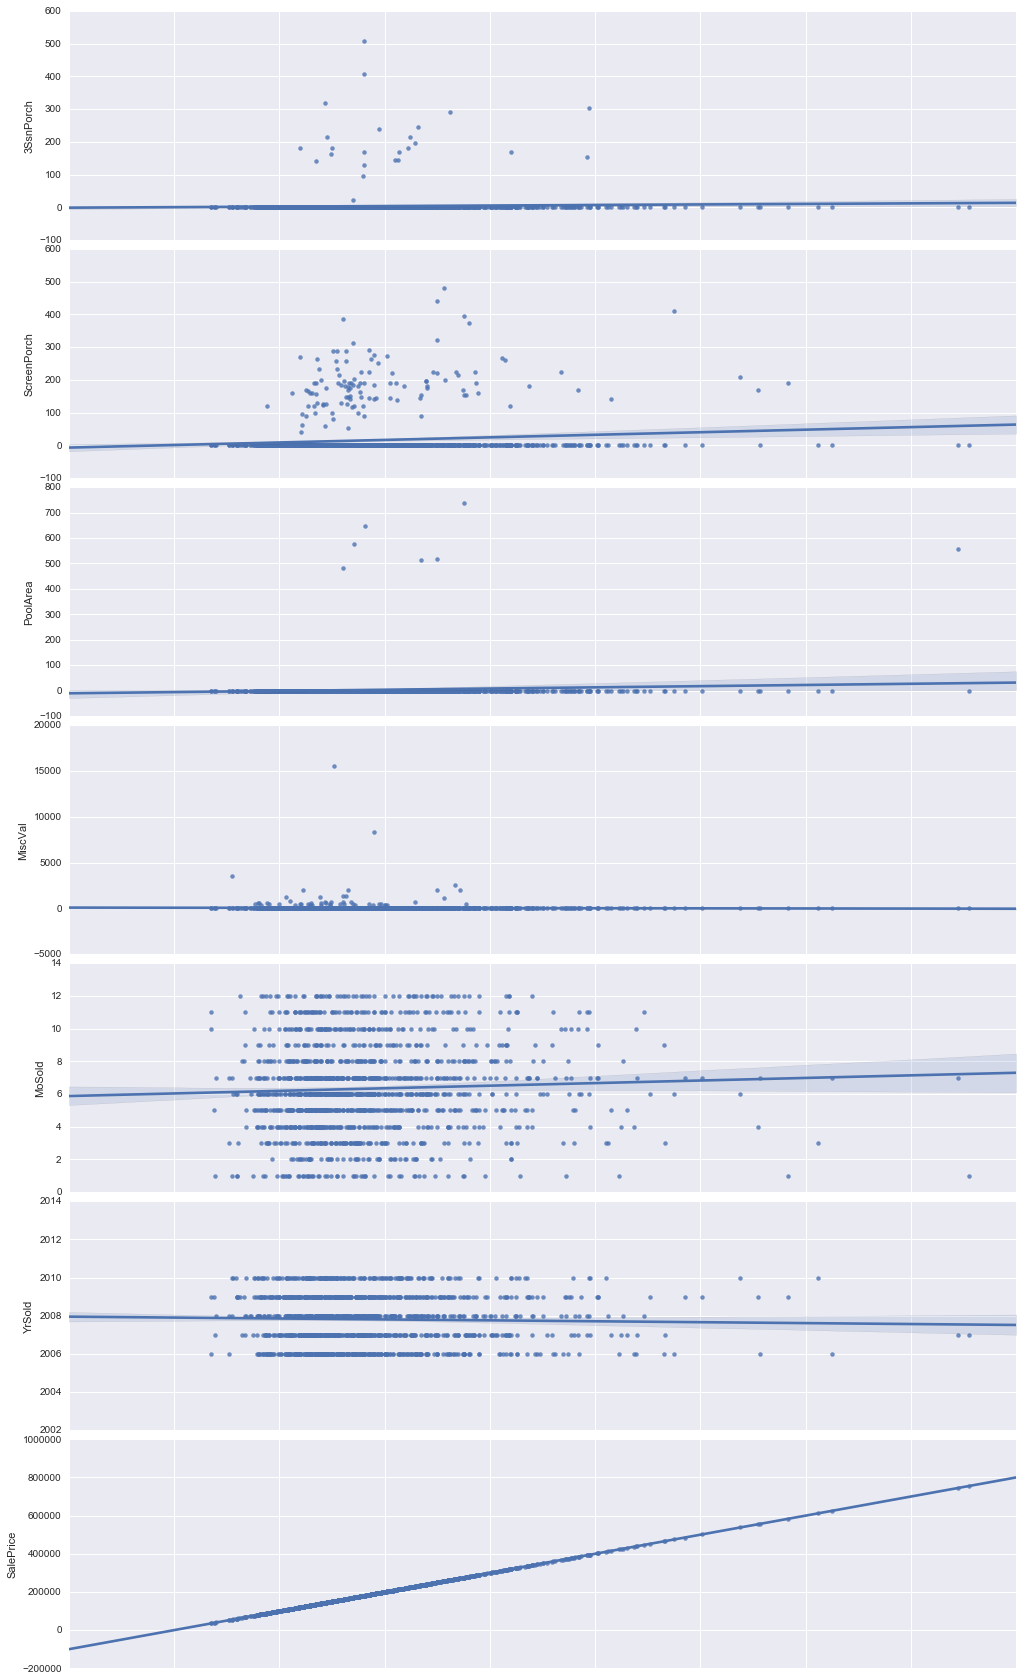

In [14]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(30,37):
    ax1 = plt.subplot(gs[i-30,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

In [15]:
# selected = ["TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", 
# "TotalBsmtSF", "1stFlrSF", "GrLivArea", "OverallQual","OverallQual", "YearBuilt", "LotFrontage"]
selected = ["TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageArea", 
"TotalBsmtSF", "GrLivArea","OverallQual", "YearBuilt", "LotFrontage"]
df_train_num_selected = df_train_num[selected]
df_train_num_selected.head()

,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,TotalBsmtSF,GrLivArea,OverallQual,YearBuilt,LotFrontage
0,8,0,2003.0,548,856,1710,7,2003,65.0
1,6,1,1976.0,460,1262,1262,6,1976,80.0
2,6,1,2001.0,608,920,1786,7,2001,68.0
3,7,1,1998.0,642,756,1717,7,1915,60.0
4,9,1,2000.0,836,1145,2198,8,2000,84.0


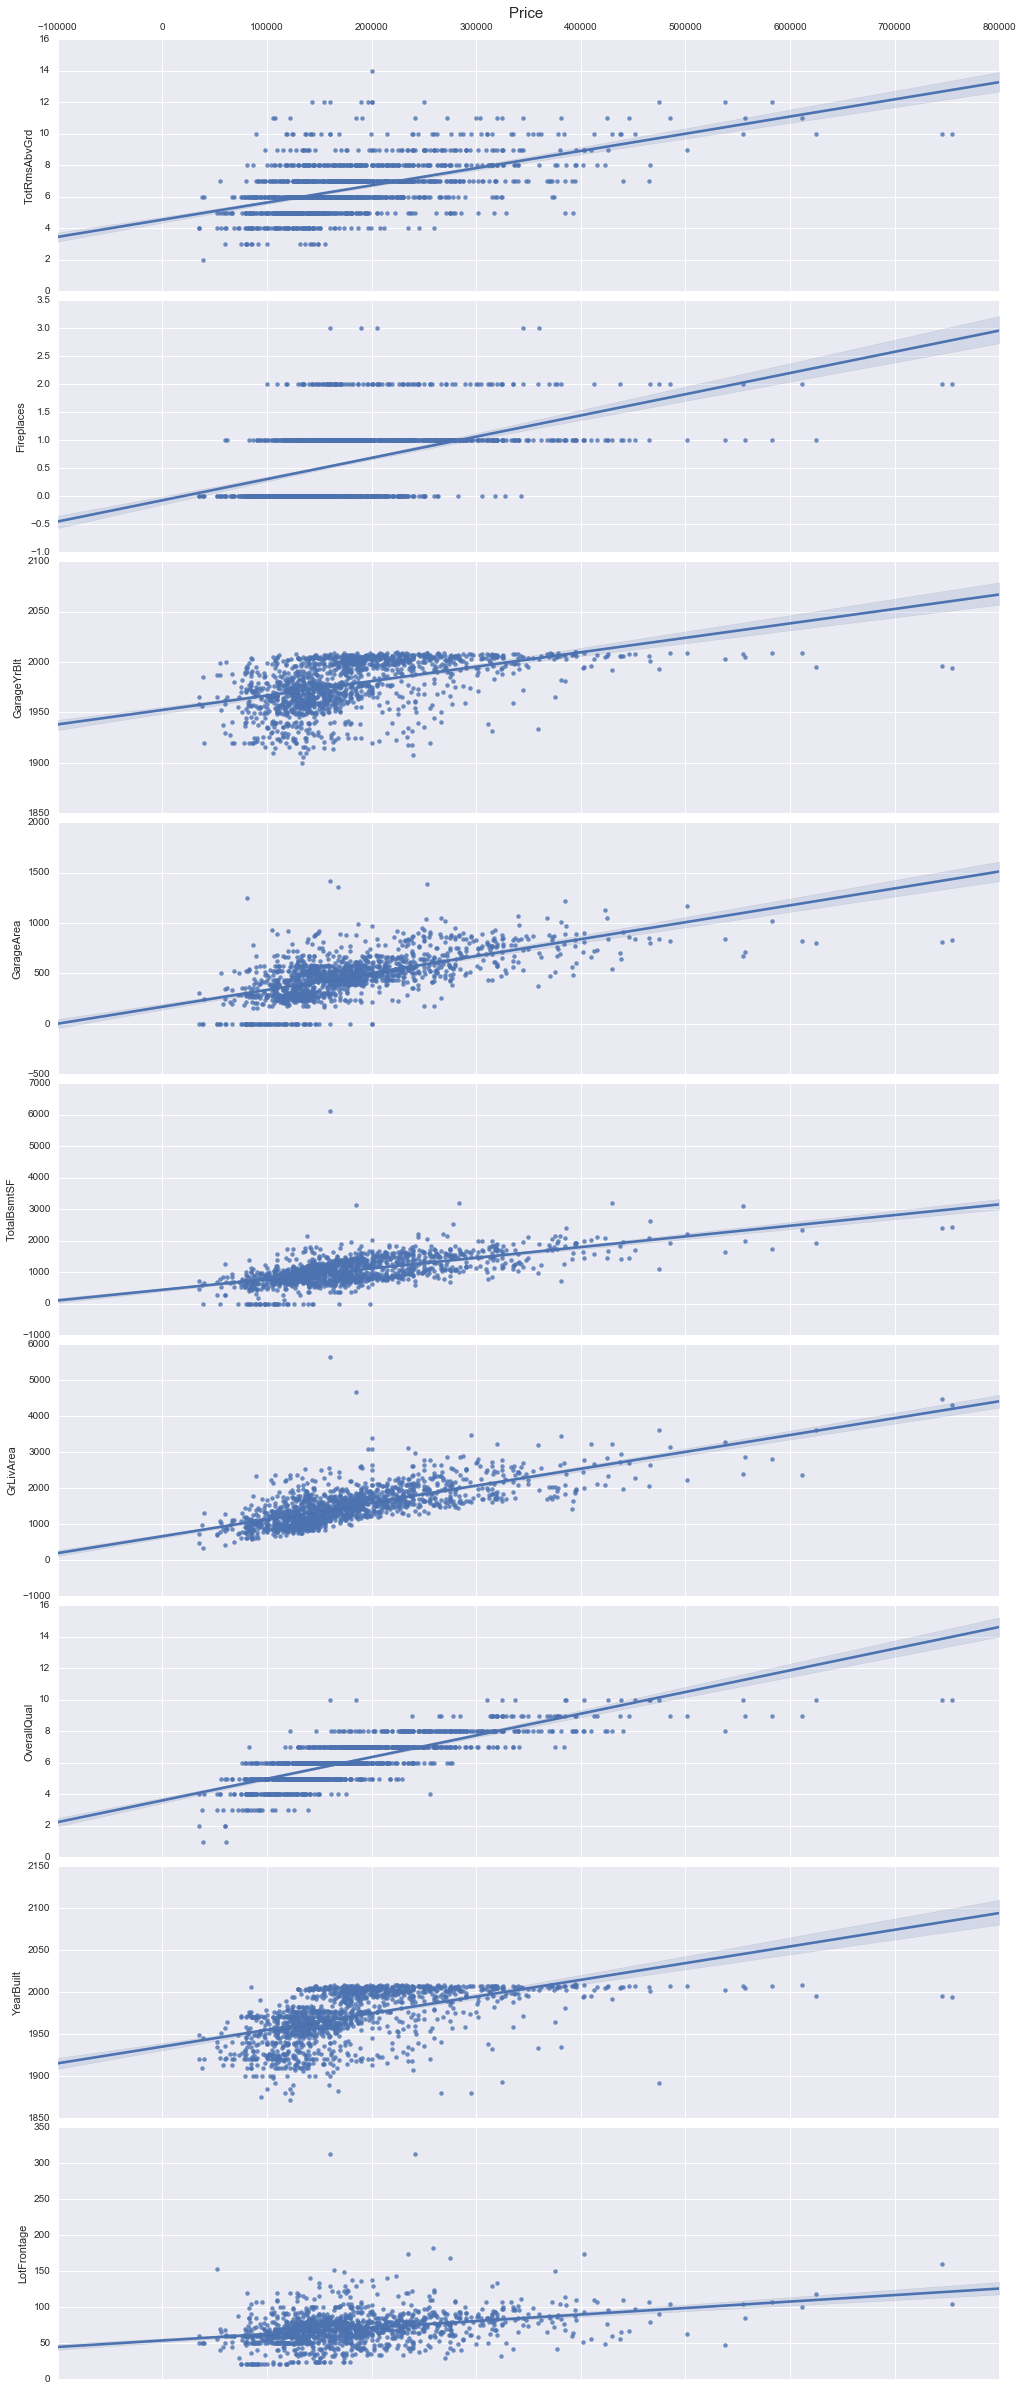

In [16]:
X_1 = df_train_num_selected 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(9, 1)

for i in range(0,9):
    ax1 = plt.subplot(gs[i,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

/Users/wannjiun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/wannjiun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


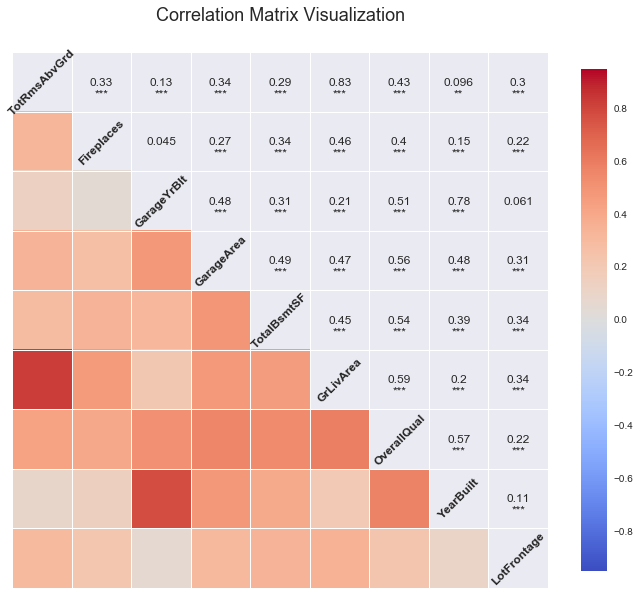

In [17]:
fig = plt.figure(figsize=(12,12))
sns.linearmodels.corrplot(df_train_num_selected)
plt.title("Correlation Matrix Visualization",fontsize=18)

In [18]:
df_train = pd.read_csv(train_file)
target = df_train["SalePrice"].values
X_train = df_train_num_selected
y_train = np.ravel(target)

len(X_train)

seed = 1
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

# df_test = pd.read_csv(test_file)
# X_test = df_test[selected]
# X_test.describe()
# np.sum(X_test.isnull()) 
# ## fill na using mean value
# # X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].mean())
# # X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(X_test['GarageYrBlt'].mean())
# # # X_test['GarageCars'] = X_test['GarageCars'].fillna(X_test['GarageCars'].mean())
# # X_test['GarageArea'] = X_test['GarageArea'].fillna(X_test['GarageArea'].mean())
# # X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mean())

# X_test = X_test.interpolate(method='linear')

np.sum(X_test.isnull()) 

TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
TotalBsmtSF     0
GrLivArea       0
OverallQual     0
YearBuilt       0
LotFrontage     0
dtype: int64

In [19]:
# Random forests
forest_model = RandomForestRegressor(n_estimators = 120,\
                                     max_depth = 5,\
                                     min_samples_split = 1,\
                                     min_samples_leaf = 1,\
                                     max_features = 'sqrt')
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=1, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
y_pred = forest_model.predict(X_test)
root_mse = np.sqrt(rmse(y_test, y_pred))
print("rmse: %.2f" % (root_mse))

rmse: 32324.20


In [21]:
# df_test = pd.DataFrame({"Id":range(1461,1461+1459),"SalePrice":y_test})
# df_test.to_csv(path+final_file,header=True,index=False)

In [22]:
# Xgboost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [23]:
y_pred = xgb_model.predict(X_test)
root_mse = np.sqrt(rmse(y_test, y_pred))
print("rmse: %.2f" % (root_mse)) 

rmse: 29787.33


In [24]:
# df_test = pd.DataFrame({"Id":range(1461,1461+1459),"SalePrice":y_test})
# df_test.to_csv(path+final_file,header=True,index=False)